In [17]:
import numpy as np
import argparse
import os

from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark3_for_rearr as Benchmark3
# from pytamp.benchmark import Benchmark3

from pytamp.search.mcts_for_rearragement import MCTS_rearrangement 


# ? python3 benchmark2_test.py --budgets 100 --max_depth 14 --seed 1 --algo bai_perturb
parser = argparse.ArgumentParser(description="Test Benchmark 3.")
parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
parser.add_argument("--max_depth", metavar="H", type=int, default=12, help="Max depth")
parser.add_argument("--seed", metavar="i", type=int, default=25, help="A random seed")
parser.add_argument(
    "--algo",
    metavar="alg",
    type=str,
    default="uct",
    choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
    help="Choose one (bai_perturb, bai_ucb, uct)",
)
parser.add_argument(
    "--debug_mode",
    default=False,
    type=lambda x: (str(x).lower() == "true"),
    help="Debug mode",
)
parser.add_argument(
    "--bottle_number",
    metavar="N",
    type=int,
    default=3,
    help="Bottle Number(6 or less.)",
)
try:
    args = parser.parse_args() #call from command line
except:
    args = parser.parse_args(args=[]) #call from notebook
    

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
number = args.bottle_number
np.random.seed(seed)

benchmark3 = Benchmark3(robot_name="panda", geom="collision", is_pyplot=False)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--bottle_number N]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9023 --control=9016 --hb=9015 --Session.signature_scheme="hmac-sha256" --Session.key=b"920f697a-7c69-43f1-8173-46cbe42e1ce2" --shell=9017 --transport="tcp" --iopub=9024 --f=/home/juju/.local/share/jupyter/runtime/kernel-v2-939636TNZhEEQ1ueUm.json


*********************** Logical States ***********************
OrderedDict([('rect_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('rect_box1',
              {'on': Object(name=rect_box0, pos=[0.72       0.3        0.79294036])}),
             ('rect_box2',
              {'on': Object(name=rect_box1, pos=[0.72       0.3        0.86631922])}),
             ('square_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('square_box1',
              {'on': Object(name=square_box0, pos=[0.85       0.4        0.79125948])}),
             ('square_box2',
              {'on': Object(name=square_box1, pos=[0.85       0.4        0.86225948])}),
             ('goal_can',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk1',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk2',
              {'on': Object(name=clea

KeyboardInterrupt: 

In [ ]:
for n, m in benchmark3.init_scene._support_objects.items():
    print(n)
    
    
np.random.normal(size=(5))

table
tray_blue


array([ 0.34621023, -0.13032121,  0.49090063, -0.26774454,  0.12767149])

In [ ]:
benchmark3.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.   -0.6  -0.03]),
 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]),
 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]),
 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]),
 'square_box0': Object(name=square_box0, pos=[0.85       0.4        0.79125948]),
 'square_box1': Object(name=square_box1, pos=[0.85       0.4        0.86225948]),
 'square_box2': Object(name=square_box2, pos=[0.85       0.4        0.93325948]),
 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]),
 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]),
 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]),
 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]),
 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]),
 'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]),
 'tray_blue': Object(name=tray_bl

{'table': Object(name=table, pos=[ 1.   -0.6  -0.03]), 'rect_box0': Object(name=rect_box0, pos=[0.72       0.3        0.79294036]), 'rect_box1': Object(name=rect_box1, pos=[0.72       0.3        0.86631922]), 'rect_box2': Object(name=rect_box2, pos=[0.72       0.3        0.93969808]), 'square_box0': Object(name=square_box0, pos=[0.85       0.4        0.79125948]), 'square_box1': Object(name=square_box1, pos=[0.85       0.4        0.86225948]), 'square_box2': Object(name=square_box2, pos=[0.85       0.4        0.93325948]), 'milk1': Object(name=milk1, pos=[0.76       0.48       0.84439365]), 'milk2': Object(name=milk2, pos=[0.64       0.42       0.84439365]), 'milk3': Object(name=milk3, pos=[0.6        0.5        0.84439365]), 'milk4': Object(name=milk4, pos=[0.58       0.35       0.84439365]), 'goal_can': Object(name=goal_can, pos=[0.72       0.4        0.83685286]), 'clearbox': Object(name=clearbox, pos=[0.7        0.4        0.73547763]), 'tray_blue': Object(name=tray_blue, pos=[0.6 

NoSuchDisplayException: Cannot connect to "None"

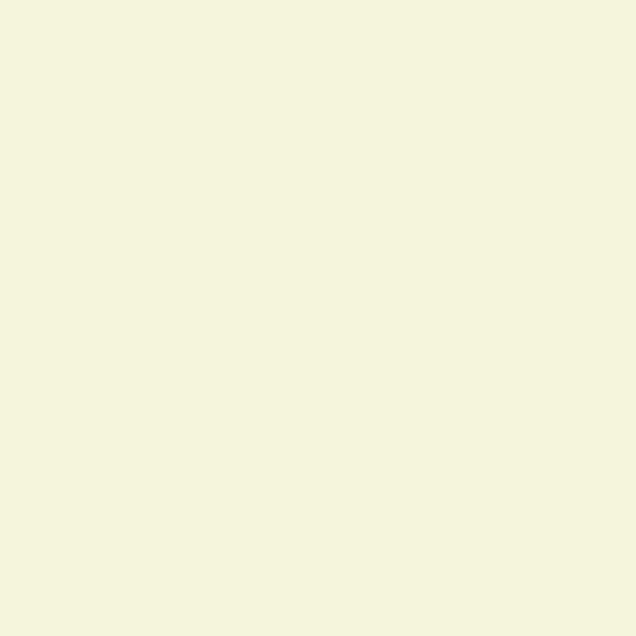

In [ ]:
fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# init_scene
benchmark3.scene_mngr.render_scene(ax)
benchmark3.render_axis(benchmark3.scene_mngr)
benchmark3.scene_mngr.show()


In [ ]:

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)
# c_list = c_list[6:]
c = 2.5

mcts = MCTS_rearrangement(
    scene_mngr=benchmark3.scene_mngr,
    init_scene = benchmark3.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c_list[6],
    debug_mode=debug_mode,
    use_pick_action=False,
    consider_next_scene=True,
    do_level_2=True,
    
)

mcts.only_optimize_1 = False

/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/scale_balance_grasp/lib/python3.7/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  '`tf.layers.batch_normalization` is deprecated and '
/home/juju/anaconda3/envs/scale_balance_grasp/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` meth

<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-29 02:12:05.211028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-29 02:12:05.211118: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-29 02:12:05.211182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-29 02:12:05.211231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-29 02:12:05.211264: I tensorflow/core/common

In [ ]:
from pytamp.utils import point_cloud_utils as pc_utils

# in pc_utils
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            benchmark3.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[0]
                            )

table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(benchmark3.init_scene, benchmark3.scene_mngr.scene)

# in pc_utils
all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])

# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

In [ ]:
import time
start_time = time.time()
idx = 0 

budgets = 10 
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark3.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 25
=========== Search iteration : 1 ===========
[Action] Rearr square_box2 to table
[Reward] S(0) -> A(2) -> S'(22) Reward : 2
[Action] Rearr milk2 to table
[Reward] S(22) -> A(25) -> S'(43) Reward : 2
Current logical action is None.. Reward is -25.0
[Reward] S(43) -> A(None) -> S'(None) Reward : -25.0
last max  value level 1 : 14.5
########### Running time :  0.8942809104919434 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 25
=========== Search iteration : 2 ===========
[Action] Rearr goal_can to tray_blue
[Reward] S(0) -> A(4) -> S'(37) Reward : 2
Success!!!!!
Terminal State! Reward is 10
last max  value level 1 : 14.5
Aleady has optimal nodes!!
Tree node value :  0
########### Running time :  0.8944432735443115 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 25
=========== Search iteration : 3 ===========
[Action] Rearr rect_box2 to table
[Reward] S(0) -> A(1) -> S'(5) Reward : 2
[Action] Rearr milk2 to tab

KeyboardInterrupt: 

In [ ]:
mcts.time_used_in_level_1, mcts.time_used_in_level_1_5, mcts.time_used_in_level_2

(5.843376636505127, 16.40838599205017, 55.23313617706299)

In [ ]:
len(mcts.pick_obj_set)

2

In [ ]:
mcts.history_level_2_dict

{0: {'nodes': [0, 1, 5, 10, 12, 13, 16, 17, 19, 20, 21], 'value': 14.6861}}

In [ ]:
mcts.history_level_1_dict

{0: {'nodes': [0, 2, 5, 7, 11, 13, 16, 19, 20], 'value': 16.0},
 1: {'nodes': [0, 1, 21, 22, 28, 29, 34, 35, 36], 'value': 16.0},
 2: {'nodes': [0, 3, 37, 38, 44, 45, 49, 51, 53, 55, 56], 'value': 5.5},
 3: {'nodes': [0, 4, 57], 'value': 11.5},
 4: {'nodes': [0, 2, 5, 10, 65], 'value': 13.0},
 5: {'nodes': [0, 1, 21, 27, 66], 'value': 13.0},
 6: {'nodes': [0, 2, 5, 7, 11, 15, 72], 'value': 14.5},
 7: {'nodes': [0, 1, 21, 22, 28, 33, 75], 'value': 14.5},
 8: {'nodes': [0, 3, 37, 43, 80], 'value': 13.0},
 9: {'nodes': [0, 3, 37, 38, 44, 48, 83], 'value': 14.5},
 10: {'nodes': [0, 3, 37, 38, 44, 45, 49, 52, 85], 'value': 16.0}}

In [ ]:
final_level_1_values = []
final_level_2_values = []
final_level_1_values.append(mcts.values_for_level_1)
final_level_2_values.append(mcts.values_for_level_2)


In [ ]:
final_level_1_values

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  7.0,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  14.5,
  17.5,
  17.5]]

In [ ]:
final_level_2_values

[[0,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  17.6688]]

In [ ]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value = mcts.history_level_1_dict[1]

print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
#     max_value_nodes = mcts.get_minimum_cost_node()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

{'nodes': [0, 1, 21, 23, 28, 30, 31], 'value': 14.5} {0: {'nodes': [0, 5, 7, 10, 12, 13, 16, 19, 20], 'value': 16.0}, 1: {'nodes': [0, 1, 21, 23, 28, 30, 31], 'value': 14.5}, 2: {'nodes': [0, 2, 32, 36, 38, 39, 43, 46, 47], 'value': 16.0}, 3: {'nodes': [0, 3, 48, 52, 53], 'value': 13.0}, 4: {'nodes': [0, 4, 54, 55, 61, 63, 65, 66, 71, 74, 75], 'value': 17.5}, 5: {'nodes': [0, 6, 76], 'value': 11.5}, 6: {'nodes': [0, 4, 54, 56, 77, 81, 83, 88, 89], 'value': 16.0}, 7: {'nodes': [0, 2, 32, 33, 90, 91, 95, 96, 97], 'value': 16.0}, 8: {'nodes': [0, 5, 7, 8, 98, 99, 101, 104, 105], 'value': 16.0}, 9: {'nodes': [0, 1, 21, 22, 106, 108, 113, 116, 118, 121, 122], 'value': 17.5}, 10: {'nodes': [0, 1, 21, 24, 123, 124, 128, 132, 134, 136, 138, 139, 141, 142, 143], 'value': -3.5}, 11: {'nodes': [0, 3, 48, 49, 144, 147, 149, 151, 153, 155, 156], 'value': 17.5}, 12: {'nodes': [0, 3, 48, 50, 157, 160, 161], 'value': 14.5}, 13: {'nodes': [0, 4, 54, 57, 162, 164, 167, 168, 171, 175, 176], 'value': 17.5

In [ ]:
mcts.get_minimum_cost_node()

[0, 5, 7, 8, 98, 100, 397]

In [ ]:
mcts.optimal_nodes

NameError: name 'mcts' is not defined

In [ ]:
# ,mcts.tree.nodes[]
print(minimum_cost_nodes)

mcts.tree.nodes[357].get('test')

In [ ]:
minimum_cost_nodes = mcts.get_minimum_cost_node()

In [ ]:
mcts.tree.nodes[33]['test'] = (mcts.tree.nodes[1]['action']['rearr_obj_name'], mcts.tree.nodes[1]['action']['rearr_poses'][0][mcts.tree.nodes[1]['action']['place_obj_name']])

In [ ]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

NameError: name 'mcts' is not defined

In [ ]:
final_pnp_all_joint_paths

NameError: name 'final_pnp_all_joint_paths' is not defined

0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


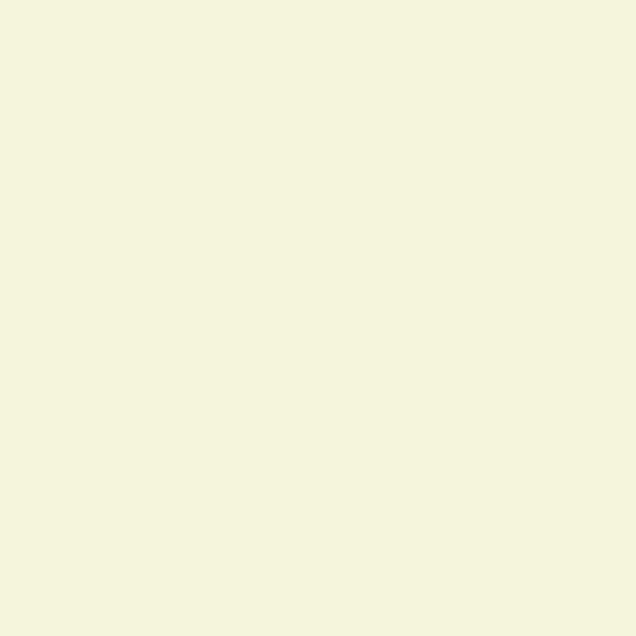

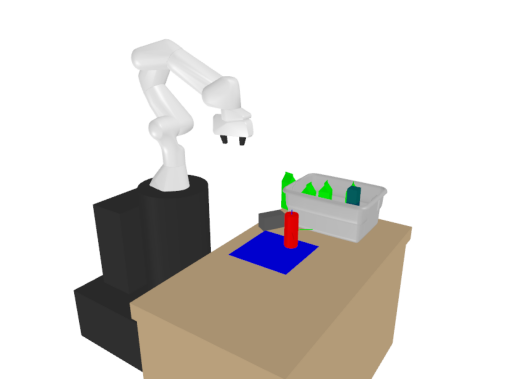

In [ ]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark3_grasp_using_contact_graspnet_consider_next_scene",
)


In [ ]:
mcts.history_level_2_dict

{0: {'nodes': [0, 1, 32, 33, 38, 42, 45, 47, 48], 'value': 6.18},
 1: {'nodes': [0, 4, 77, 78, 319, 321, 324, 325, 329, 331, 332],
  'value': 6.18}}

In [ ]:
nodes

[0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]

nodes [0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]
Here doesn't have grasp


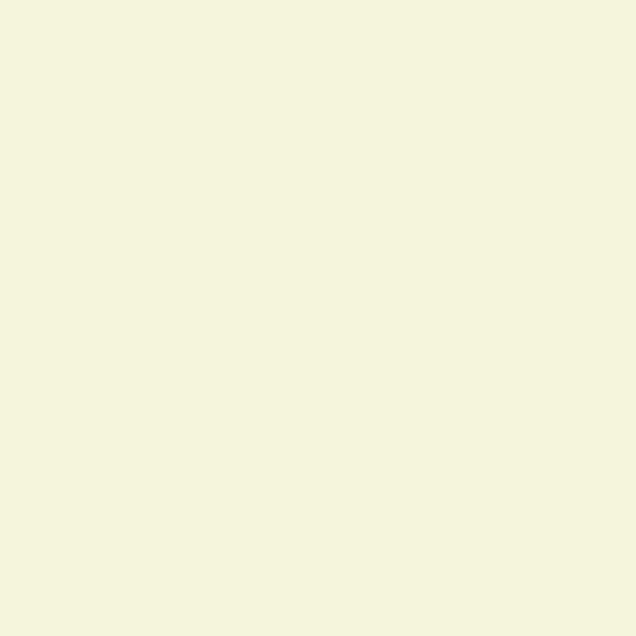

In [ ]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
# j, nodes = mcts.get_max_value_nodes_level_1()

nodes = mcts.history_level_1_dict[4]['nodes']

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [ ]:
nodes = mcts.history_level_1_dict[4]['nodes']

In [ ]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 0

current_node = mcts.tree.nodes[nodes[2*i + 1]]
next_node = mcts.tree.nodes[nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = benchmark3.init_scene,
    next_node = next_node,
    current_node = current_node,
    )

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



milk3
Extracted Region Cube Size:  0.4140609034817153
Random sample points 
Generated 9 grasps for object milk3


In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i) +1]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [ ]:
obj_file_path = '/home/juju/contact_graspnet/acronym/meshes/5Shelves/4382a7a2860ff8dda67210eeab485ee6.obj'